In [1]:
from deduce_uces.stages.core import GenomeWithCoreKmers
from deduce_uces.Genome import Genome
from deduce_uces.run import ProgramContext
from deduce_uces.Logger import NullLogger

genomes = [
    GenomeWithCoreKmers(Genome(name="hg16", source_files=[]), "../data/bej04/50bp_nonunique/mm_hg16.bam"),
    GenomeWithCoreKmers(Genome(name="rn3", source_files=[]), "../data/bej04/50bp_nonunique/mm_rn3.bam"),
    GenomeWithCoreKmers(Genome(name="mm3", source_files=[]), "../data/bej04/50bp_nonunique/mm_mm3.bam")
]

context = ProgramContext(threads=4, logger=NullLogger(), working_dir='../data/bej04/50bp_nonunique')

ModuleNotFoundError: No module named 'deduce_uces'

In [ ]:
from itertools import product

def run_hyperparameter_tests():
    hyper_params = itertools.product()

In [2]:
from deduce_uces.cli import parse_args
args = parse_args(['find', '--uce-min-length', '200', '--core-kmer-threshold', '100', '--core-kmer-size', '50', '--core-kmer-non-unique-buffer', '0', '--uce-min-identity', '100'])


In [28]:
import pysam
from multiprocessing import Pool
from functools import partial


def read_alignments_in_contig(contig, filename):
    f1 = pysam.AlignmentFile(filename, 'rb')

    for alignment in f1.fetch(contig=contig, multiple_iterators=True):
        return [alignment.query_name]


def read():
    
    f = partial(read_alignments_in_contig, filename="../data/bej04/50bp_nonunique/mm_hg16.bam")
    with Pool(4) as p:
        print([x for x in p.imap_unordered(f, f1.references)])

read()

[['c10643'], ['c875492'], ['c990164'], ['c1015400'], ['c1256612'], ['c678446'], ['c130354'], ['c10643'], ['c15849'], ['c83113'], ['c393417'], ['c1068506'], ['c364341'], ['c804256'], ['c1132896'], ['c920088'], ['c736509'], ['c426586'], ['c114254'], None, ['c970336'], ['c114254'], ['c893307'], ['c938885'], ['c782212'], ['c503895'], ['c998295'], ['c231601'], ['c604351'], ['c573308'], ['c390825'], ['c418082'], ['c391557'], ['c1006002'], ['c10643'], None, None, ['c723083'], ['c303244'], ['c246776'], ['c1284886'], ['c84127']]


In [3]:
from deduce_uces.stages.candidates import get_merged_candidates_by_genome

candidates_by_genome = get_merged_candidates_by_genome(genomes, args, context)

KeyboardInterrupt: 

In [31]:
matched_within = match_in_genomes(candidates_by_genome, context)

Candidates: matching UCEs across genomes...
Candidates: identified 15 UCE candidates
Candidates: calculating consensus sequences and filtering by homology...


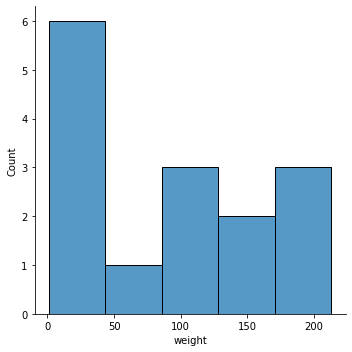

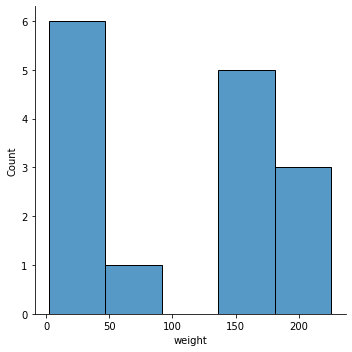

In [32]:
matched_across = match_across_genomes(matched_within, context)
matched_across

In [33]:
min_homology = float(args.uce_min_identity) / 100
uces = UCEs.from_uce_instances(
    matched_across,
    min_genomes=core_genomes_required,
    min_homology=min_homology,
    reference_genome=args.reference,
)
uces

<UCEInstanceSet uces=15>